In [53]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt 
%matplotlib inline
dropout = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/dropout.xls")

In [93]:
print("\n Correlation between dropout rates at different stages of schooling\n")
x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']].corr().style.background_gradient(cmap='RdBu')

,PRIMARY_TOTAL,UPPER_PRIMARY_TOTAL,SECONDARY_TOTAL,HRSECONDARY_TOTAL
PRIMARY_TOTAL,1.000000,0.807927,0.282216,-0.207872
UPPER_PRIMARY_TOTAL,0.807927,1.000000,0.519793,-0.194535
SECONDARY_TOTAL,0.282216,0.519793,1.000000,-0.318201
HRSECONDARY_TOTAL,-0.207872,-0.194535,-0.318201,1.000000


In [54]:
states=[]
for i in range(36):
    states.append(dropout.STATE_UT.iloc[3*i])
states=pd.DataFrame(states, columns=['State'])
dropout.drop(['STATE_UT','YEAR'],axis=1,inplace=True)
x=pd.DataFrame()
for i in range(36):
    x[i]=dropout.iloc[3*i+0:i*3+3,:].mean()
x=x.transpose()    

In [94]:
def create_clusters(x):

    scores=[]
    for i in range(4,36):
        k=KMeans(n_clusters=i,n_init=500, max_iter=500)
        k.fit(x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']])
        label=KMeans.predict(k,x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']])
        scores.append(silhouette_score(x, label))

    pd.DataFrame(scores).plot()
    best_cluster_no=np.argmax(scores[2:36])+2
    plt.axvline(best_cluster_no)
    plt.text(best_cluster_no, 0.34,s=f"Max silhoutte score at n={best_cluster_no}")
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte score")
    kk=KMeans(n_clusters=best_cluster_no)

    kk.fit(x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']])
    lab = pd.DataFrame(kk.labels_,columns=['Labels'])
    result=pd.concat([states['State'],x,lab['Labels']],axis=1)
    return result

,PRIMARY_BOYS,PRIMARY_GIRLS,PRIMARY_TOTAL,UPPER_PRIMARY_BOYS,UPPER_PRIMARY_GIRLS,UPPER_PRIMARY_TOTAL,SECONDARY_BOYS,SECONDARY_GIRLS,SECONDARY_TOTAL,HRSECONDARY_BOYS,HRSECONDARY_GIRLS,HRSECONDARY_TOTAL
Labels,,,,,,,,,,,,
0,3.560278,3.564167,3.560833,2.321389,2.959444,2.469167,12.516111,11.215000,11.882500,3.686389,3.297500,3.454167
1,10.330000,9.690556,10.010000,8.924444,9.190556,9.053889,23.383333,24.190556,23.773889,4.001667,3.218889,3.513889
2,8.031111,6.542222,7.317778,4.553333,5.427778,4.987778,15.345556,14.138889,14.723333,13.167778,9.982222,11.591111
3,1.763333,1.420000,1.566667,3.401667,3.225000,3.078333,29.315000,29.018333,29.173333,4.240000,1.876667,2.881667
4,2.483333,2.312857,2.388571,3.687619,4.082857,3.715714,20.128571,19.333333,19.800000,8.419048,6.204762,7.246190
5,3.123333,3.116667,3.120000,3.773333,3.163333,3.473333,43.073333,42.853333,42.966667,0.000000,0.000000,0.000000
6,0.326667,0.340667,0.325333,1.020667,0.943333,0.721333,7.687333,5.633333,6.725333,15.950667,9.204667,12.832667


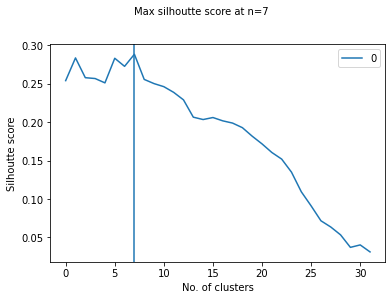

In [95]:
result=create_clusters(x)
result.groupby('Labels')[result.columns[1:-1]].agg('mean').style.background_gradient(cmap="RdBu")

In [92]:
grouping=result[['State','Labels']]
clusters=pd.DataFrame()
for l in grouping.Labels.unique():
    clusters=pd.concat([clusters,pd.Series(np.array(grouping.State[grouping.Labels==l]), name=f"Cluster {l+1}").to_frame()],axis=1)
clusters.sort_index(axis=1)    

,Cluster 1,Cluster 2
0,A & N Islands,Assam
1,Andhra Pradesh,Bihar
2,Arunachal Pradesh,Chhattisgarh
3,Chandigarh,Dadra & Nagar Haveli
4,Daman & Diu,Gujarat
5,Delhi,Jharkhand
6,Goa,Karnataka
7,Haryana,Madhya Pradesh
8,Himachal Pradesh,Meghalaya
9,Jammu & Kashmir,Mizoram
